In [1]:
import numpy as np  
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/Phenotypes/final_test_data/CSVs/TS-373_IMC47_B_002.csv')
test_df.rename(columns={'phenotype': 'Phenotype'}, inplace=True)
pred_df = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/standard/phenotyping/phenotypes_scanorama_corrected_complete/TS-373_IMC47_B_002.csv')
pred_df.rename(columns={'phenotype': 'Phenotype'}, inplace=True)
merged_df = pd.merge(test_df, pred_df, on='CellID', suffixes=('_manual', '_predicted'))

In [3]:
merged_df

,Unnamed: 0,CD38_manual,Perilipin_manual,Vimentin_manual,B4GALT1_manual,MPO_manual,CathepsinK_manual,ATP5A_manual,RUNX2_manual,HIF1A_manual,...,6,area_predicted,Y_centroid_predicted,X_centroid_predicted,axis_major_length_predicted,axis_minor_length_predicted,eccentricity_predicted,distance_to_bone_predicted,image_ID,Phenotype_predicted
0,phenotyping_TS-373_IMC47_B_002_1,0.580976,0.234858,0.590430,0.141301,0.324336,0.036508,0.544064,0.069966,0.309447,...,0.084752,6,0.500000,236.000000,3.265986,2.000000,0.790569,62.769419,TS-373_IMC47_B_002,Plasma Cells/MM cells
1,phenotyping_TS-373_IMC47_B_002_2,0.240624,0.386534,0.146503,0.381842,0.308637,0.026656,0.192249,0.113175,0.257398,...,0.103611,10,0.500000,268.300000,5.691105,2.640327,0.885867,58.549125,TS-373_IMC47_B_002,Unknown
2,phenotyping_TS-373_IMC47_B_002_3,0.519643,0.553634,0.566500,0.531282,0.792394,0.222537,0.411068,0.324947,0.706914,...,0.092674,19,1.368421,277.947368,5.770302,4.663765,0.588859,59.774577,TS-373_IMC47_B_002,Neutrophils
3,phenotyping_TS-373_IMC47_B_002_4,0.548965,0.561569,0.718584,0.649405,0.759807,0.178145,0.377785,0.255144,0.540095,...,0.117825,15,1.066667,524.933333,5.359965,3.714191,0.720985,136.400147,TS-373_IMC47_B_002,activated Macrophages/Monocytes
4,phenotyping_TS-373_IMC47_B_002_5,0.714688,0.602091,0.689862,0.622422,0.369825,0.193883,0.739278,0.285918,0.434731,...,0.083990,17,1.000000,599.411765,6.319655,3.588672,0.823126,205.234013,TS-373_IMC47_B_002,Plasma Cells/MM cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,phenotyping_TS-373_IMC47_B_002_5745,0.477060,0.350796,0.433913,0.434346,0.409415,0.059610,0.658849,0.116152,0.362092,...,0.096958,27,997.185185,326.407407,6.393645,5.422028,0.529942,138.636215,TS-373_IMC47_B_002,Plasma Cells/MM cells
5740,phenotyping_TS-373_IMC47_B_002_5746,0.513646,0.534509,0.530055,0.625286,0.952781,0.424901,0.705731,0.220813,0.195246,...,0.089148,25,997.280000,361.600000,7.452282,4.401032,0.806993,121.235308,TS-373_IMC47_B_002,Unknown
5741,phenotyping_TS-373_IMC47_B_002_5747,0.690734,0.451623,0.436827,0.462034,0.528769,0.195581,0.507844,0.057984,0.256164,...,0.088624,18,997.555556,354.111111,5.024993,4.790300,0.302042,126.051577,TS-373_IMC47_B_002,Plasma Cells/MM cells
5742,phenotyping_TS-373_IMC47_B_002_5748,0.411326,0.359284,0.502653,0.503704,0.856610,0.242815,0.444353,0.293643,0.225828,...,0.096804,31,997.935484,421.000000,12.021486,3.202496,0.963863,95.524866,TS-373_IMC47_B_002,Endothelial cells


In [4]:
y_true = merged_df['Phenotype_manual']
y_pred = merged_df['Phenotype_predicted']
class_names = sorted(y_true.unique())
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

print( "scanorama-corrected maps complete classifier for IMC79-1_B_002 \n" + classification_report(y_true, y_pred))

scanorama-corrected maps complete classifier for IMC79-1_B_002 
                                 precision    recall  f1-score   support

                     Adipocytes       0.62      0.98      0.76        58
                     CD4+Tcells       0.78      0.83      0.80        69
                          CD68+       0.23      0.64      0.34        56
                     CD8+Tcells       0.77      0.96      0.85       130
                Dendritic Cells       0.78      0.58      0.67        31
              Endothelial cells       0.69      0.95      0.80        64
                           HSCs       0.68      0.70      0.69        60
                           MPO+       0.58      0.64      0.61       384
          Macrophages/Monocytes       0.09      0.58      0.16        90
                    Neutrophils       0.97      0.46      0.62      1606
                    Osteoblasts       0.95      0.95      0.95        20
                    Osteoclasts       1.00      1.00      1

In [5]:
cm = confusion_matrix(y_true, y_pred, normalize='true')

Text(95.7222222222222, 0.5, 'True')

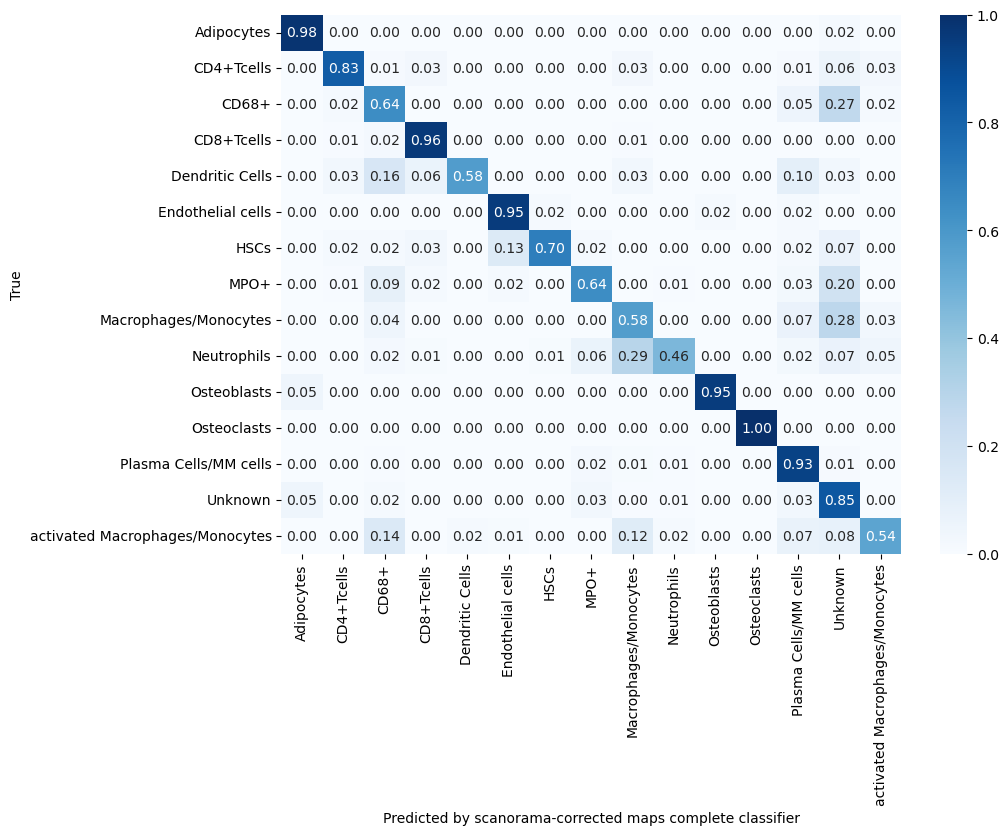

In [6]:
class_names = sorted(y_true.unique())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted by scanorama-corrected maps complete classifier')
plt.ylabel('True')